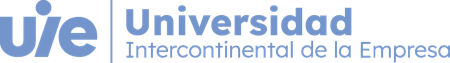

**G25GXX3.10X. Aprendizaje Automático**

**Profesor: Borja González Seoane**

Curso 2025-26

# PLD4. Análisis Discriminante Lineal (LDA) en 5 Pasos

En esta práctica se implementará un modelo de análisis discriminante lineal (LDA) a partir de la especificación en 5 pasos disponible en las transparencias de la Unidad II de la asignatura \[`Transparencias U2-S05`\]. 

Objetivos:

- **Implementar el LDA en 5 pasos desde cero en Python, utilizando sólo librerías básicas como NumPy o Pandas**.
- Comentar el código para relacionar teoría y práctica.
- Utilizar un arquetipo orientado a objetos, como en PLD3.
- Probar con el conjunto de datos Iris.


In [1]:
import numpy as np
import ucimlrepo

In [2]:
TEST_SPLIT_SIZE = 0.3
RANDOM_STATE = 42

## Carga del conjunto de datos

In [3]:
iris = ucimlrepo.fetch_ucirepo(name='iris')

In [4]:
display(iris)

{'data': {'ids': None,
  'features':      sepal length  sepal width  petal length  petal width
  0             5.1          3.5           1.4          0.2
  1             4.9          3.0           1.4          0.2
  2             4.7          3.2           1.3          0.2
  3             4.6          3.1           1.5          0.2
  4             5.0          3.6           1.4          0.2
  ..            ...          ...           ...          ...
  145           6.7          3.0           5.2          2.3
  146           6.3          2.5           5.0          1.9
  147           6.5          3.0           5.2          2.0
  148           6.2          3.4           5.4          2.3
  149           5.9          3.0           5.1          1.8
  
  [150 rows x 4 columns],
  'targets':               class
  0       Iris-setosa
  1       Iris-setosa
  2       Iris-setosa
  3       Iris-setosa
  4       Iris-setosa
  ..              ...
  145  Iris-virginica
  146  Iris-virginica
  147  

In [5]:
X = iris["data"]["features"]
display(X)

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
y = iris["data"]["targets"]
display(y)

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


### Se transforma la columna de especies a numérico

Más conveniente para el análisis posterior.

In [7]:
from sklearn.preprocessing import LabelEncoder

enc= LabelEncoder()
enc=enc.fit(y)

y=enc.transform(y)

display(y)

c:\Users\Usuario\anaconda3\envs\uie-aa\Lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Usuario\anaconda3\envs\uie-aa\Lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Implementación del LDA en 5 pasos

Primero se implementarán las diferentes partes del LDA en 5 pasos. Luego se acoplarán en una clase-arquetipo para poder utilizarlo de forma más sencilla.

### Paso 1. Calcular las medias de las características para cada clase

In [8]:
def __calcular_vector_m(x, y, cl):
  return np.mean(X[y == cl], axis=0)




### Paso 2. Calcular la matrices de dispersión intraclase e interclase

#### Intraclase

In [9]:
def __calcular_matriz_dispersion_intra(X, y, cl, mv):
    s_intra = np.zeros((X.shape[1], X.shape[1]))

    for row in X[y==cl]:
        s_intra += (row - mv).dot((row-mv).T)

    return s_intra

#### Interclase

In [10]:
def __calcular_matriz_dispersion_inter(X, y, mv):
    m_global = np.mean(X,axis=0)
    
    
    s_inter = np.zeros((X.shape[1], X.shape[1]))

    for m in mv:
        s_inter += (m-m_global).dot((m-m_global).T)

    return s_inter

### Paso 3. Calcular los eigenvectores y eigenvalores de la matriz de dispersión

In [11]:
def __calcular_matriz_eogen(s_intra,s_inter):
    eig_vals, eig_vecs = np.linalg.eigs(np.linalg.inv(s_intra).dot(s_inter))

    # Comprobación

    return eig_vals, eig_vecs

### Paso 4. Seleccionar los discriminantes de Fisher

Ordenar los eigenvectores según sus eigenvalores en orden descendente. Se forma una matriz de proyección $W$, de dimensión $d \times k$, donde $d$ es el número de características y $k$ es el número de clases menos uno.

In [12]:
def __seleccionar_discriminantes_lineales(
        eig_vals, eig_vecs,

        n_discriminantes
):
    eig_pares =[(eig_vals, eig_vecs,)]

    eig_pares = sorted (eig_pares, key=lambda k: k[0], reverse= True)
    

### Paso 5. Usar la matriz de proyección $W$ para proyectar las características originales

In [13]:
# Usamos la matriz de proyeccioón para proyectar las características originales
def proyectar_caracteristicas(X, W):
    return X.dot(W) 

## Arquetipado de la clase

Se implementa una clase que encapsula el proceso de LDA en 5 pasos. Se incluyen métodos para entrenar el modelo y para predecir nuevas observaciones.

Interfaz pública:

- `fit(X, y)`: Entrena el modelo.
- `predict(X)`: Predice la clase de nuevas observaciones.


In [14]:
# Esqueleto de la clase a implementar


class LDAClassifier5Pasos:
    def __init__(self):  # Constructor de la clase. Impleméntese si es necesario
        pass

    def fit(self, X: np.ndarray, y: np.ndarray):
        raise NotImplementedError("Impleméntese este arquetipo esqueleto")

    def predict(self, X: np.ndarray) -> np.ndarray:
        raise NotImplementedError("Impleméntese este arquetipo esqueleto")

In [15]:
class LDAClassifier5Pasos:
    def __init__(self, n_discriminantes):
        self.n_discriminantes = n_discriminantes
        self.W = None
        self.centroides = None
        self._msg_error_no_entrenado = (
            "No se ha entrenado el modelo. Úsese `fit` antes de proyectar los datos."
        )

    def fit(self, X: np.ndarray, y: np.ndarray):
        """
        Ajusta el clasificador LDA a los datos de entrenamiento `X` e `y`.
        """
        # CORRECCIÓN: Convertir a arrays NumPy
        X = np.array(X)
        y = np.array(y)
        
        # Vector de medias de las clases
        mv = np.array([self.__calcular_vector_m(X, y, cl) for cl in np.unique(y)])

        # CORRECCIÓN: Cambiar nombre de variable en la iteración
        s_intra = np.sum(
            [
                self.__calcular_matriz_dispersion_intra(X, y, cl, media_clase)
                for cl, media_clase in zip(np.unique(y), mv)  # usar media_clase en lugar de mv
            ],
            axis=0,
        )
        s_inter = self.__calcular_matriz_dispersion_inter(X, y, mv)

        # Eigenvalores y eigenvectores
        eig_vals, eig_vecs = self.__calcular_matriz_eigen(s_intra, s_inter)

        # Seleccionar los discriminantes lineales
        self.W = self.__seleccionar_discriminantes_lineales(
            eig_vals, eig_vecs, s_inter, self.n_discriminantes
        )

        # Proyección de los datos de entrenamiento
        X_proy = self.proyectar(X)

        # Cálculo de los centroides
        self.centroides = np.array(
            [np.mean(X_proy[y == cl], axis=0) for cl in np.unique(y)]
        )

    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Predice las etiquetas de las nuevas muestras de entrada `X`.
        """
        if self.W is None or self.centroides is None:
            raise ValueError(self._msg_error_no_entrenado)

        # CORRECCIÓN: Convertir a array NumPy
        X = np.array(X)
        
        # Proyectar los datos
        X_proy = self.proyectar(X)

        # Inferir la clase
        y_pred = np.zeros(X_proy.shape[0])
        for i, x in enumerate(X_proy):
            y_pred[i] = np.argmin(
                [np.linalg.norm(x - centroide) for centroide in self.centroides]
            )  # CORRECCIÓN: quitar el +1

        return y_pred

    def proyectar(self, X):
        """
        Proyecta los datos `X` en el espacio de las características transformadas por `W`.
        """
        if self.W is None:
            raise ValueError(self._msg_error_no_entrenado)

        return X.dot(self.W)

    ###############################################################
    # Métodos internos (privados)

    @staticmethod
    def __calcular_vector_m(X, y, cl):
        return np.mean(X[y == cl], axis=0)

    @staticmethod
    def __calcular_matriz_dispersion_intra(X, y, cl, mv):
        s_intra = np.zeros((X.shape[1], X.shape[1]))

        for row in X[y == cl]:
            row, mv = row.reshape(X.shape[1], 1), mv.reshape(X.shape[1], 1)
            s_intra += (row - mv).dot((row - mv).T)

        return s_intra

    @staticmethod
    def __calcular_matriz_dispersion_inter(X, y, mv):
        m_global = np.mean(X, axis=0).reshape(X.shape[1], 1)
        
        s_inter = np.zeros((X.shape[1], X.shape[1]))

        for m in mv:
            m = m.reshape(X.shape[1], 1)
            s_inter += (m - m_global).dot((m - m_global).T)

        return s_inter

    @staticmethod
    def __calcular_matriz_eigen(s_intra, s_inter):
        eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(s_intra).dot(s_inter))

        for i in range(len(eig_vals)):
            eig_vec = eig_vecs[:, i].reshape(s_inter.shape[0], 1)
            eig_val = eig_vals[i]
            A = np.linalg.inv(s_intra).dot(s_inter)
            np.testing.assert_array_almost_equal(
                A.dot(eig_vec),
                eig_val * eig_vec,
                decimal=6,
                err_msg=f"Error en el vector propio {i}",
            )
        print(f"Eigenvectores y eigenvalores correctos.")

        return eig_vals, eig_vecs

    @staticmethod
    def __seleccionar_discriminantes_lineales(
        eig_vals, eig_vecs, s_inter, n_discriminantes
    ):
        eig_pares = [
            (np.abs(eig_vals[i]), eig_vecs[:, i]) for i in range(len(eig_vals))
        ]
        eig_pares = sorted(eig_pares, key=lambda k: k[0], reverse=True)

        eig_vals_sum = sum(eig_vals)
        print(f"La varianza explicada por cada discriminante lineal es:")
        for par_idx, par in enumerate(eig_pares):
            print(f"Par {par_idx}: `{(par[0]/eig_vals_sum).real:.2%}`")

        return np.hstack(
            [
                eig_pares[i][1].reshape(s_inter.shape[0], 1)
                for i in range(n_discriminantes)
            ]
        )

## Prueba final con Iris y evaluación del modelo

Se prueba el modelo con el conjunto de datos Iris. Se analiza la reducción de dimensionalidad a partir del _log_ de la varianza explicada por cada discriminante de Fisher.

En este caso se mide la **precisión** del modelo.

Utilícense particiones para entrenamiento y test.

In [16]:
# Probamos con el conjunto de datos Iris con 3 discriminantes
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SPLIT_SIZE, random_state=RANDOM_STATE
)
modelo_3discriminantes = LDAClassifier5Pasos(n_discriminantes=3)

modelo_3discriminantes.fit(X_train, y_train)

modelo_3discriminantes.predict(X_test)



Eigenvectores y eigenvalores correctos.
La varianza explicada por cada discriminante lineal es:
Par 0: `99.03%`
Par 1: `0.97%`
Par 2: `0.00%`
Par 3: `0.00%`


array([1., 0., 2., 1., 1., 0., 1., 2., 1., 1., 2., 0., 0., 0., 0., 1., 2.,
       1., 1., 2., 0., 2., 0., 2., 2., 2., 2., 2., 0., 0., 0., 0., 1., 0.,
       0., 2., 1., 0., 0., 0., 2., 1., 1., 0., 0.])

In [17]:
# Evaluamos el modelo con 3 discriminantes
from sklearn.metrics import accuracy_score
y_pred = modelo_3discriminantes.predict(X_test)
precision = accuracy_score(y_test, y_pred)
print(f"Precisión: {precision:.2f}")

Precisión: 1.00


In [18]:
# Ahora con 2 discriminantes
modelo_2discriminantes = LDAClassifier5Pasos(n_discriminantes=2)
modelo_2discriminantes.fit(X_train, y_train) 
modelo_2discriminantes.predict(X_test)   

Eigenvectores y eigenvalores correctos.
La varianza explicada por cada discriminante lineal es:
Par 0: `99.03%`
Par 1: `0.97%`
Par 2: `0.00%`
Par 3: `0.00%`


array([1., 0., 2., 1., 1., 0., 1., 2., 1., 1., 2., 0., 0., 0., 0., 1., 2.,
       1., 1., 2., 0., 2., 0., 2., 2., 2., 2., 2., 0., 0., 0., 0., 1., 0.,
       0., 2., 1., 0., 0., 0., 2., 1., 1., 0., 0.])

In [19]:
# Evaluamos el modelo con 2 discriminantes
y_pred_2 = modelo_2discriminantes.predict(X_test)
precision_2 = accuracy_score(y_test, y_pred_2)
print(f"Precisión: {precision_2:.2f}")


Precisión: 1.00
